In [4]:
import pandas as pd

# read latest covid-19 statistics from github
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(url)

# show first lines
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [5]:
# csv into pandas data structure
df = pd.DataFrame(data)

# show countries starts with C (looking for Czechia)
df[df['Country/Region'].str.startswith('C')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
32,NaN,Cabo Verde,16.5388,-23.0418,0,0,0,0,0,0,...,1,3,3,3,3,4,4,5,5,6
33,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,51,53,84,87,91,96,96,99,99,103
34,NaN,Cameroon,3.8480,11.5021,0,0,0,0,0,0,...,20,27,40,56,66,75,75,91,91,139
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,146,195,259,301,359,358,486,542,542,621
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,271,424,424,472,617,617,725,725,884,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,Czechia,49.8175,15.4730,0,0,0,0,0,0,...,833,995,1120,1236,1394,1654,1925,2279,2631,2817
231,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,Recovered,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [135]:
# focus on selected countries
selected_countries = df.loc[df['Country/Region'].isin(['Czechia', 'Germany', 'Italy', 'US'])]
selected_countries


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
91,NaN,Czechia,49.8175,15.4730,0,0,0,0,0,0,...,833,995,1120,1236,1394,1654,1925,2279,2631,2817
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886


In [151]:
# values only
countries = selected_countries.loc[:, '1/22/20':]

# aligned but
# aligned_countries = countries[countries > 20]
# aligned_countries

names = df['Country/Region'].to_dict()

aligned_series = []
for i in range(len(countries)):
    serie = countries.iloc[i]
    serie.name = names[serie.name]
    aligned_series.append(serie[serie > 20])


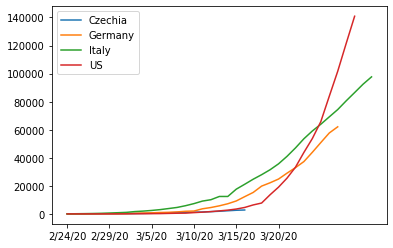

In [152]:
# show off the plot
for s in aligned_series:
    s.plot.line(legend=True)